# Task #2 Prediction using Unsupervised Learning

### In this notebook, our goal is to determine the optimal number of clusters for the iris dataset and visualize the results.



# By : Sara Hamza 

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pandas as pd

In [94]:
import warnings
warnings.filterwarnings('ignore')

In [95]:
seed = 42 # for consistent results

## # Loading Dataset

In [96]:
dataset = pd.read_csv('Iris - Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## # Target Label Removal

As it is an unsupervised task, so we first drop 'Species' column
which is the target label.


In [97]:
X = dataset.drop('Species', axis=1)
all_features = X
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


## # Data Cleansing: Finding Duplicate and Null Values

In [98]:
X.duplicated().sum()

0

In [99]:
duplicates = X[X.duplicated()]
duplicates

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm


In [100]:
X = X.drop_duplicates()
X.duplicated().sum()

0

In [101]:
X.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

As we can see there is no null values or duplicates.

## # Feature Engineering

Drop the 'Id' column because it is redundant information as it may lead to irrelevant pattern detection by the algorithm.

In [102]:
X.drop('Id', axis=1, inplace=True)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Let's dive into our dataset and explore the features that have the most impact.

In [103]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 5.9 KB


In [104]:
X.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


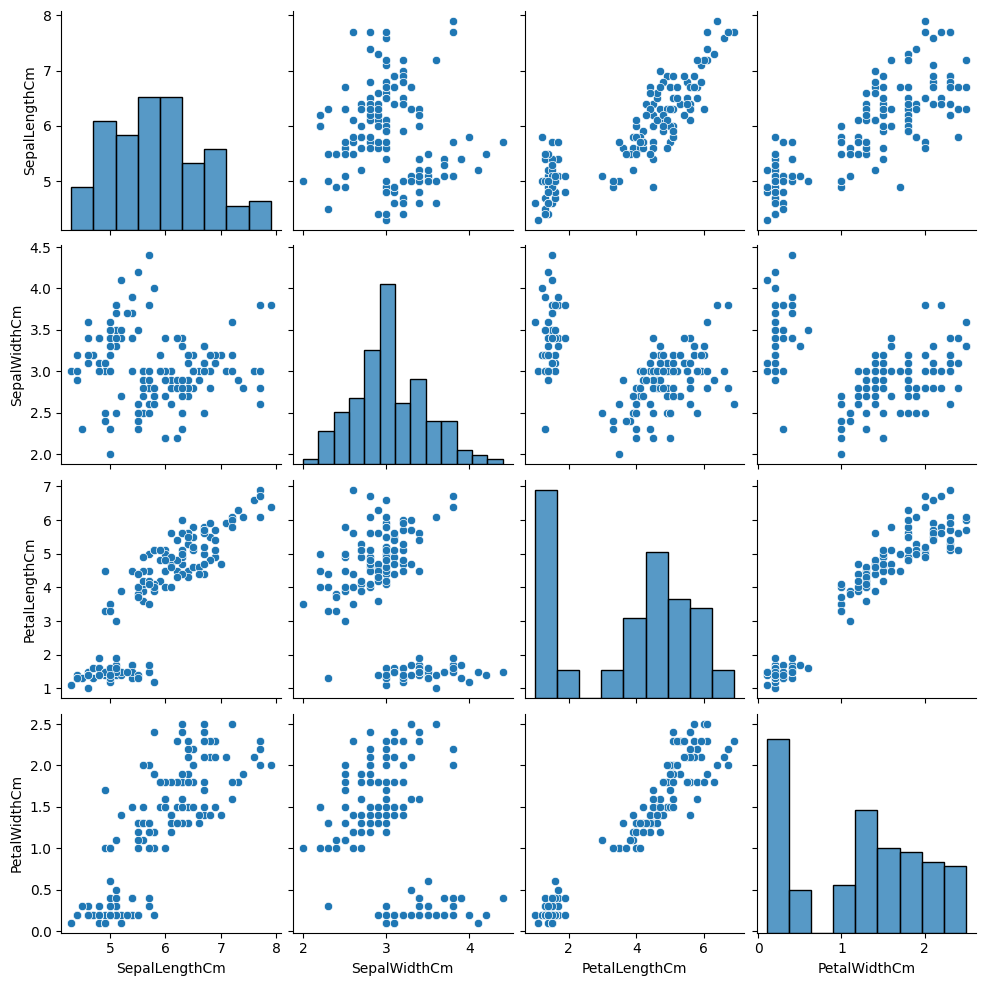

In [105]:
sns.pairplot(X)

<Axes: >

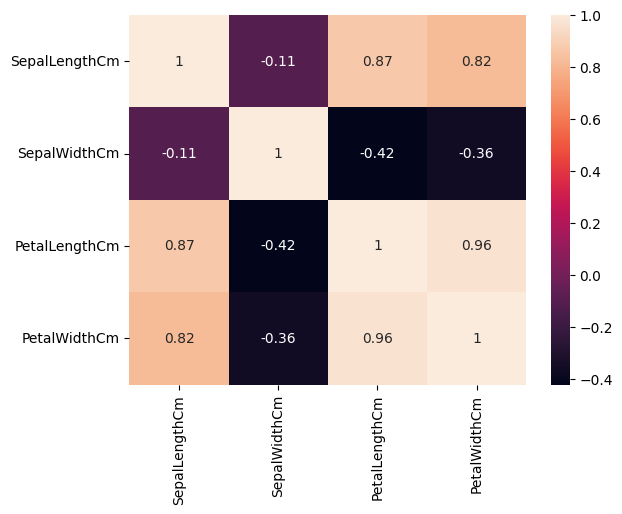

In [106]:
corrmat = X.corr()
sns.heatmap(corrmat, annot=True)

As we see there is a **strong +ve correlation** between PetalLengthCm and PetalWidthCm, so we can drop any of them.

In [107]:
X.drop('PetalWidthCm', axis=1, inplace=True)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


## # Clustering using Kmeans and Evaluation using different methods

### elbow method & selhouette scores

- We will use <b>kmeans</b> for clustering and do it 7 times with 7 different values of k ranging from 1 to 7 inclusive.<br>
Then, we evaluate and choose the optimal value of k - the number of clusters - according to the<br> sum of squared distances using Elbow method .<br>
- We also will use silhouette_score for further insights.

In [108]:
# inertia refers to the sum of squared distances between each data
# point and its assigned cluster centroid.

inertia = []
k_values = range(1,8)
selhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=seed)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    if k > 1 :
        score = silhouette_score(X, kmeans.labels_)
        selhouette_scores.append(score)

Ploting the sum of squared distances of each k

Text(0, 0.5, 'selhouette scores')

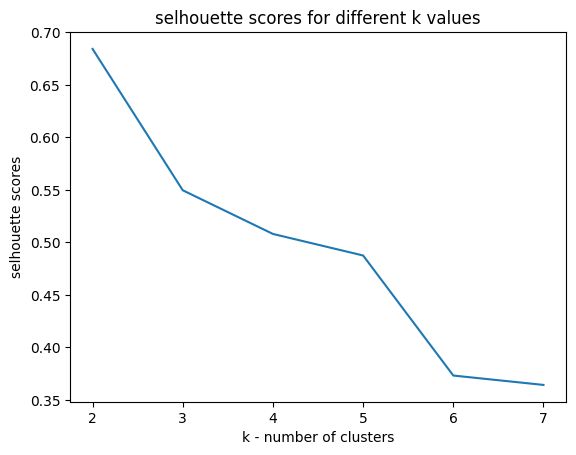

In [109]:
plt.plot(k_values[1:], selhouette_scores)
plt.title('selhouette scores for different k values')
plt.xlabel('k - number of clusters')
plt.ylabel('selhouette scores')

As we choose the maximum silhouette score, We can see that k=2 has the highest score, then k=3, and after that k=4. <br>
Let's see the elbow method.

Text(0, 0.5, 'inertia')

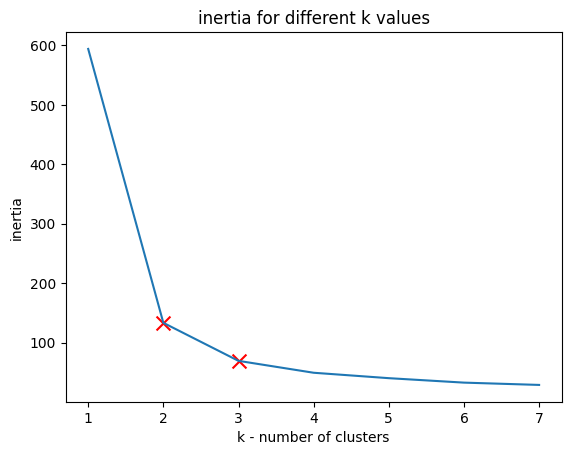

In [110]:
plt.plot(k_values, inertia)
plt.scatter(k_values[1:3], inertia[1:3], color='red', marker='x', s=100)
plt.title('inertia for different k values')
plt.xlabel('k - number of clusters')
plt.ylabel('inertia')

As we can see we can choose <b>"2"</b> or <b>"3"</b> as the optimal value for the number of clusters as shown in the fig below

### PCA Visualization

Visualizing the dataset with different numbers of clusters may help in selecting the most relevant number of clusters too. Consequently, we will perform dimensionality reduction on our features using PCA to enable effective visualization.

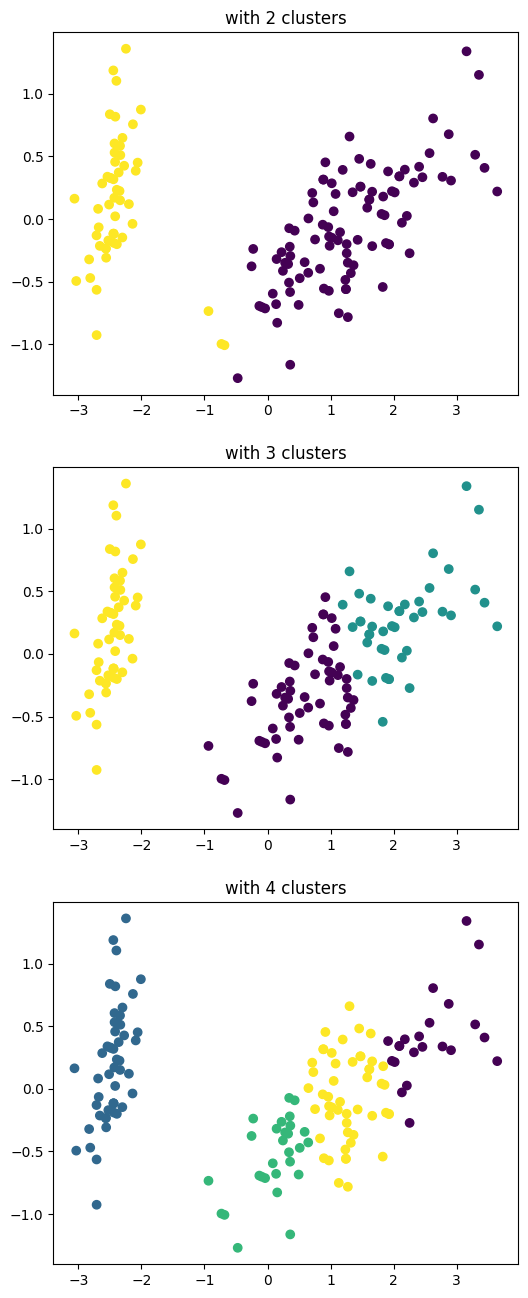

In [111]:
k_values = range(2,5)
fig, axs = plt.subplots(3, 1, figsize=(6, 16))
for k in k_values:
    # reduce number of features to only 2 to visualize them
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)
    
    # apply kmeans on the reduced features
    kmeans = KMeans(n_clusters=k, random_state=seed)
    kmeans.fit(X_reduced)
    
    # visualization part
    plt.subplot(3, 1, k-1)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_)
    plt.title(f"with {k} clusters")


After applying PCA, it is evident that there are 2 distinct clusters one on the left and one on the right side of the plot. However, in this case, I will choose 3 as the value of k for clustering, because it is in the middle between dividing the right cluster into three parts, and not dividing it at all.

## # Kmeans with k = 3

In [112]:
# generate labels for our training examples
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=seed)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [113]:
# create a dataframe of after labeling dataset
feature_names = ['SepalLengthCm',
                'SepalWidthCm',
                'PetalLengthCm',
                'PetalWidthCm']
labeled_df = pd.DataFrame(all_features, columns = feature_names)
labeled_df['Species'] = kmeans.labels_
labeled_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


# Dataset visualization after clustering

### 1. Visualizing clustered data with the centroids for the first 2 features only

Text(0, 0.5, 'SepalWidthCm')

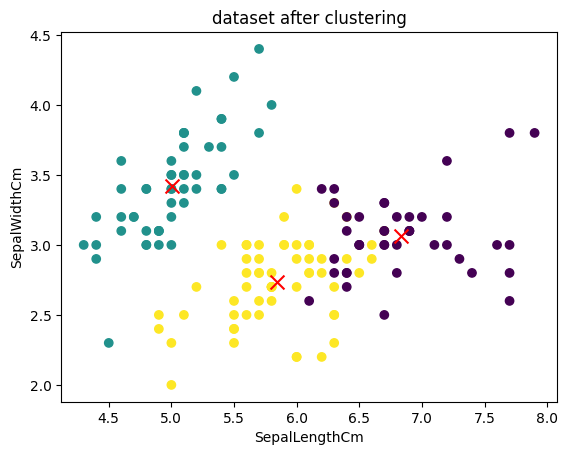

In [114]:
plt.scatter(x=labeled_df['SepalLengthCm'], y=labeled_df['SepalWidthCm'], c=labeled_df['Species'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red')
plt.title("dataset after clustering")
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')

### 2. Clustered data with the centroids for each 2 features paired together

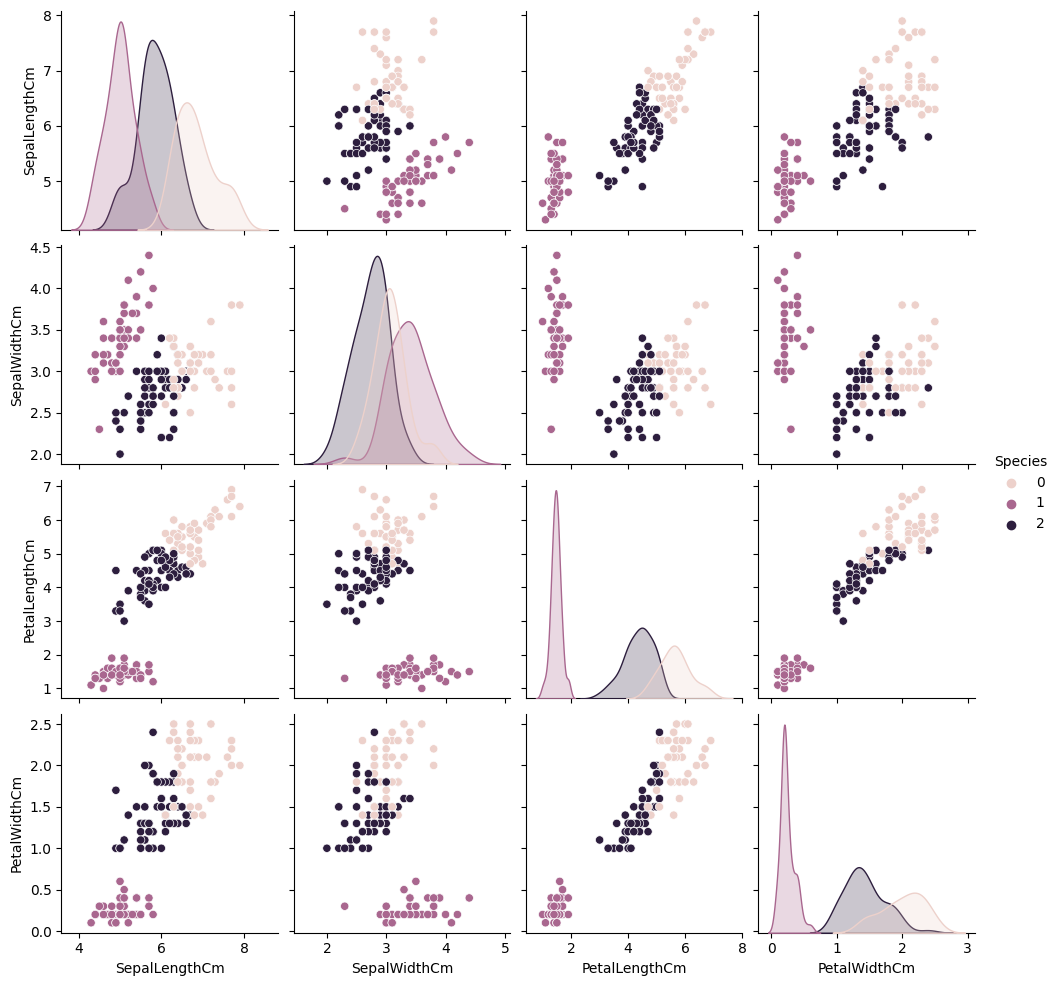

In [115]:
sns.pairplot(labeled_df, hue='Species')

Thank you for exploring this notebook. I hope you found it informative and valuable.<br> I am thankful for any feedback <br>